In [1]:
import pandas as pd

Data Pre-processing:


In [2]:
dt=pd.read_csv("/content/AppleProductssales.csv")

In [3]:
dt.dtypes

ID                 object
Store_id            int64
Store_Type         object
Apple_products     object
Region_Code        object
Date               object
Holiday             int64
Discount           object
#Order              int64
Sales             float64
dtype: object

In [ ]:
dt.info() #to get the structure of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              188340 non-null  object 
 1   Store_id        188340 non-null  int64  
 2   Store_Type      188340 non-null  object 
 3   Apple_products  188340 non-null  object 
 4   Region_Code     188340 non-null  object 
 5   Date            188340 non-null  object 
 6   Holiday         188340 non-null  int64  
 7   Discount        188340 non-null  object 
 8   #Order          188340 non-null  int64  
 9   Sales           188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [ ]:
dt.isnull().sum() # to check the null values

ID                0
Store_id          0
Store_Type        0
Apple_products    0
Region_Code       0
Date              0
Holiday           0
Discount          0
#Order            0
Sales             0
dtype: int64

In [4]:
dt['Store_id']=dt['Store_id'].astype("category")
dt['Store_Type']=dt['Store_Type'].astype("category")
dt['Apple_products']=dt['Apple_products'].astype("category")
dt['Region_Code']=dt['Region_Code'].astype("category")
dt['Discount']=dt['Discount'].astype("category")
# converting all necessary datatype into categorical.

In [5]:
dt['year'] = pd.to_datetime(dt['Date'], format='%d-%m-%Y').dt.year #Extrancting year only as it was in yera format only.

In [6]:
dt.dtypes

ID                  object
Store_id          category
Store_Type        category
Apple_products    category
Region_Code       category
Date                object
Holiday              int64
Discount          category
#Order               int64
Sales              float64
year                 int32
dtype: object

In [7]:
dt=dt.drop(["ID","Date"],axis=1)

In [8]:
dt['year']=dt['year'].astype("category")

In [ ]:
dt['Apple_products'].unique()

['MacBookAir', 'Airpods', 'Applewatch']
Categories (3, object): ['Airpods', 'Applewatch', 'MacBookAir']

As we have 3 different category of apple product we are making 3 new dataframe according to the product.

In [9]:
MacBookAir_data = dt[dt['Apple_products'] == 'MacBookAir']

In [10]:
MacBookAir_data.head()

,Store_id,Store_Type,Apple_products,Region_Code,Holiday,Discount,#Order,Sales,year
0,1,S1,MacBookAir,R1,1,Yes,9,7011.84,2018
3,251,S2,MacBookAir,R1,1,Yes,23,19715.16,2018
4,250,S2,MacBookAir,R4,1,Yes,62,45614.52,2018
5,249,S1,MacBookAir,R2,1,Yes,39,34211.22,2018
18,237,S2,MacBookAir,R3,1,Yes,55,44858.67,2018


In [12]:
import matplotlib.pyplot as plt
import seaborn as sb

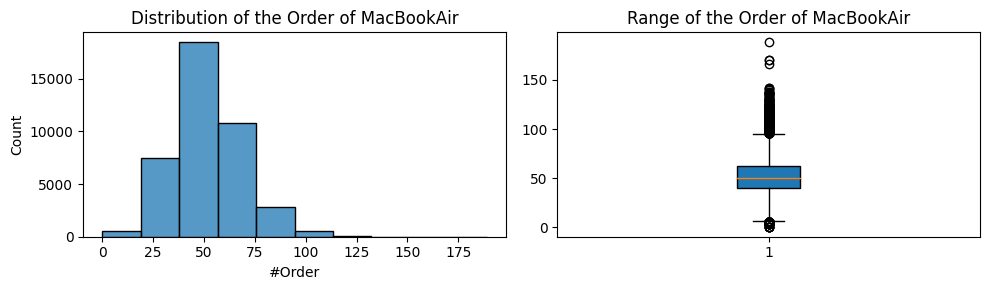

In [13]:
#import warnings

#warnings.filterwarnings("ignore")

#We are making the histogram and box plot to check the distribution of #Order.

fig, axes = plt.subplots(1,2, figsize=(10,3)) #plt.subplots()::creates a figure and one row with two columns of subplots (1 row and 2 columns).

sb.histplot(MacBookAir_data['#Order'],bins=10,ax=axes[0]) #bin::number of bins (intervals) in the histogram.

plt.boxplot(MacBookAir_data['#Order'],patch_artist = True) #patch_artist::used to fill the boxes with colors in the box plot.

axes[0].set_title('Distribution of the Order of MacBookAir')

axes[1].set_title('Range of the Order of MacBookAir')

plt.tight_layout()

plt.show()

In [ ]:
MacBookAir_data.shape

(40764, 9)

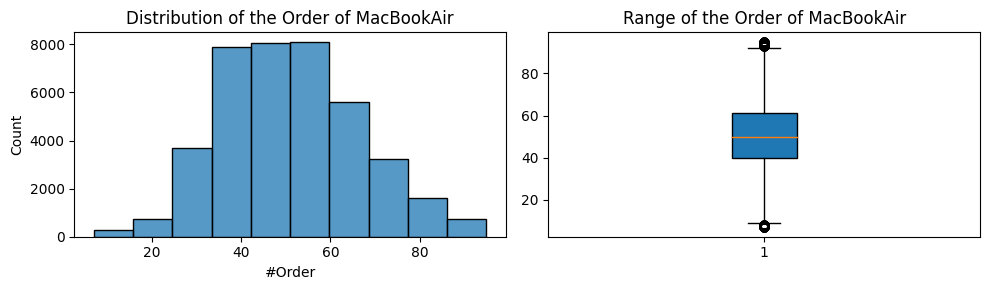

In [14]:
Q1=MacBookAir_data['#Order'].quantile(0.25)
Q3=MacBookAir_data['#Order'].quantile(0.75)
IQR= Q3 - Q1
Upperbound_order = Q3 + 1.5*IQR
lowerbound_order = Q1 - 1.5*IQR
Index2=MacBookAir_data.loc[MacBookAir_data['#Order']>Upperbound_order,"#Order"].index
Index1=MacBookAir_data.loc[MacBookAir_data['#Order']<lowerbound_order,"#Order"].index
MacBookAir_data=MacBookAir_data.drop(Index2)
MacBookAir_data=MacBookAir_data.drop(Index1)
fig, axes = plt.subplots(1,2, figsize=(10,3))

sb.histplot(MacBookAir_data['#Order'],bins=10,ax=axes[0])

plt.boxplot(MacBookAir_data['#Order'],patch_artist = True)

axes[0].set_title('Distribution of the Order of MacBookAir')

axes[1].set_title('Range of the Order of MacBookAir')

plt.tight_layout()

plt.show()

In [ ]:
MacBookAir_data.shape

(39918, 9)

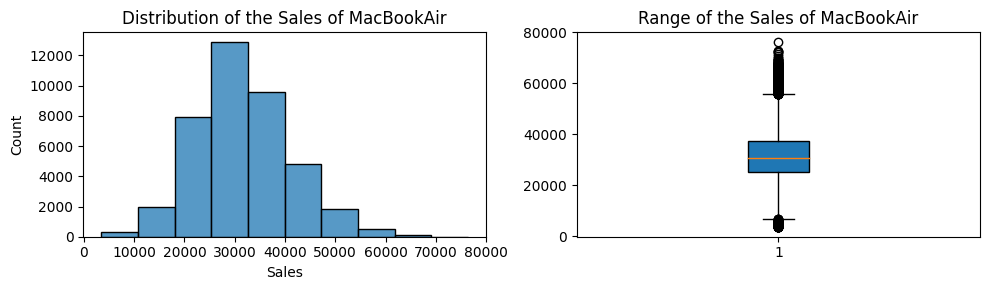

In [15]:
#import warnings

#warnings.filterwarnings("ignore")

#We are making the histogram and box plot to check the distribution of Sales.(which is our target variable.)

fig, axes = plt.subplots(1,2, figsize=(10,3)) #plt.subplots()::creates a figure and one row with two columns of subplots (1 row and 2 columns).

sb.histplot(MacBookAir_data['Sales'],bins=10,ax=axes[0]) #bin::number of bins (intervals) in the histogram.

plt.boxplot(MacBookAir_data['Sales'],patch_artist = True) #patch_artist::used to fill the boxes with colors in the box plot.

axes[0].set_title('Distribution of the Sales of MacBookAir')

axes[1].set_title('Range of the Sales of MacBookAir')

plt.tight_layout()

plt.show()

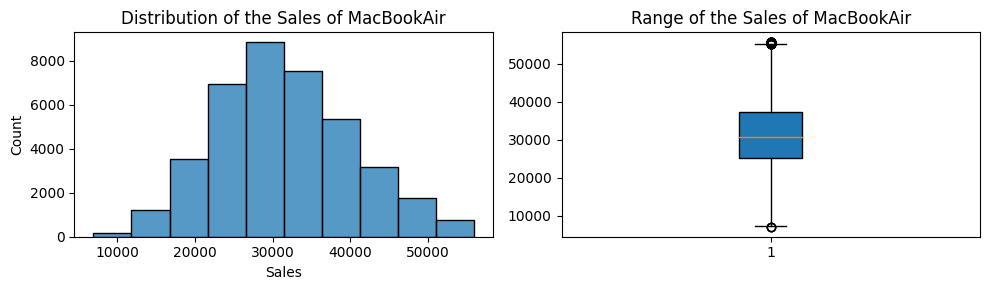

In [16]:
Q1=MacBookAir_data['Sales'].quantile(0.25)
Q3=MacBookAir_data['Sales'].quantile(0.75)
IQR= Q3 - Q1
Upperbound_order = Q3 + 1.5*IQR
lowerbound_order = Q1 - 1.5*IQR
Index2=MacBookAir_data.loc[MacBookAir_data['Sales']>Upperbound_order,"Sales"].index
Index1=MacBookAir_data.loc[MacBookAir_data['Sales']<lowerbound_order,"Sales"].index
MacBookAir_data=MacBookAir_data.drop(Index2)
MacBookAir_data=MacBookAir_data.drop(Index1)
fig, axes = plt.subplots(1,2, figsize=(10,3))

sb.histplot(MacBookAir_data['Sales'],bins=10,ax=axes[0])

plt.boxplot(MacBookAir_data['Sales'],patch_artist = True)

axes[0].set_title('Distribution of the Sales of MacBookAir')

axes[1].set_title('Range of the Sales of MacBookAir')

plt.tight_layout()

plt.show()

In [17]:
MacBookAir_data.shape

(39202, 9)

We are ploting bar plot for all categorical data in the dataset airpods data.

In [ ]:
MacBookAir_data['Store_Type'].unique()

['S1', 'S2', 'S3']
Categories (4, object): ['S1', 'S2', 'S3', 'S4']

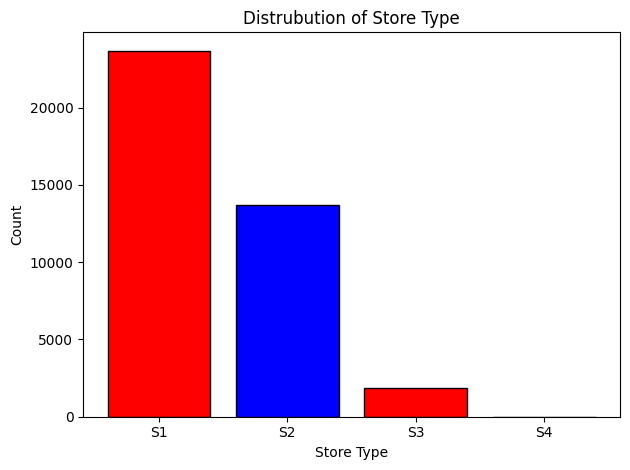

In [ ]:
st1 = MacBookAir_data.loc[MacBookAir_data['Store_Type'] == 'S1', ].shape[0] # .loc method is used to filter the DataFrame based on the condition
st2 = MacBookAir_data.loc[MacBookAir_data['Store_Type'] == 'S2', ].shape[0] #shape[0] is used to get the number of rows that meet the condition.
st3 = MacBookAir_data.loc[MacBookAir_data['Store_Type'] == 'S3', ].shape[0]
st4 = MacBookAir_data.loc[MacBookAir_data['Store_Type'] == 'S4', ].shape[0]


slice = [st1,st2,st3,st4]
labels = ["S1", "S2","S3","S4"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('Store Type')
plt.ylabel('Count')
plt.title('Distrubution of Store Type')

plt.tight_layout()

In [ ]:
MacBookAir_data['Region_Code'].unique()

['R1', 'R4', 'R2', 'R3']
Categories (4, object): ['R1', 'R2', 'R3', 'R4']

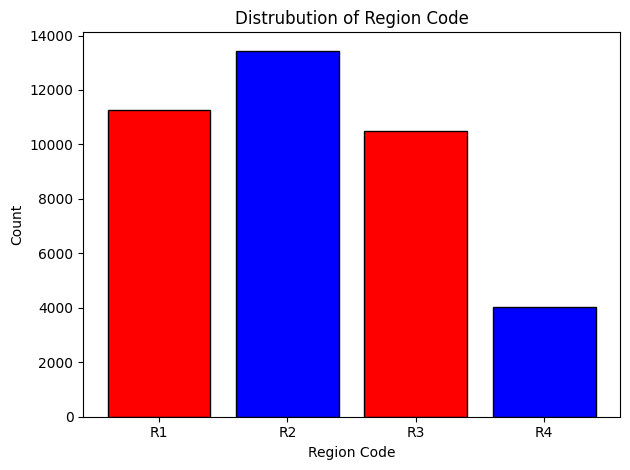

In [ ]:
r1 = MacBookAir_data.loc[MacBookAir_data['Region_Code'] == 'R1', ].shape[0] # .loc method is used to filter the DataFrame based on the condition
r2 =MacBookAir_data.loc[MacBookAir_data['Region_Code'] == 'R2', ].shape[0] #shape[0] is used to get the number of rows that meet the condition.
r3 = MacBookAir_data.loc[MacBookAir_data['Region_Code'] == 'R3', ].shape[0]
r4 = MacBookAir_data.loc[MacBookAir_data['Region_Code'] == 'R4', ].shape[0]


slice = [r1,r2,r3,r4]
labels = ["R1", "R2","R3","R4"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('Region Code')
plt.ylabel('Count')
plt.title('Distrubution of Region Code')

plt.tight_layout()

In [ ]:
MacBookAir_data['Discount'].unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

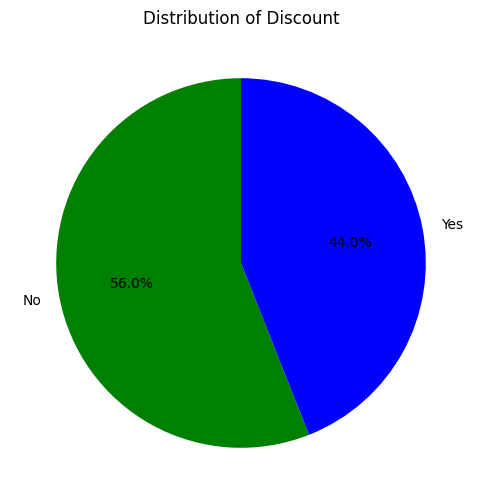

In [ ]:
dc = MacBookAir_data['Discount'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(dc, labels=dc.index, autopct='%1.1f%%', startangle=90, colors=['green', 'blue'])
plt.title('Distribution of Discount')
plt.show()

In [ ]:
MacBookAir_data['Holiday'].unique()

array([1, 0])

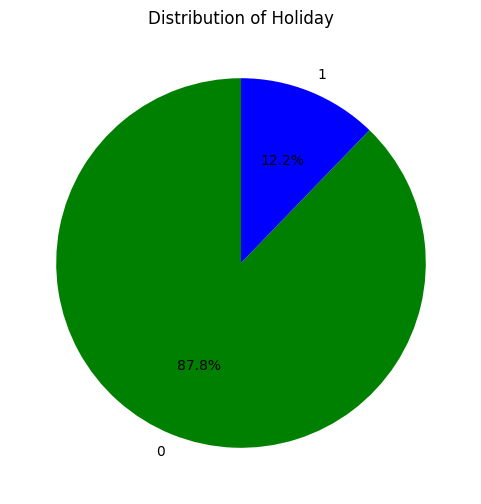

In [ ]:
HD = MacBookAir_data['Holiday'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(HD, labels=HD.index, autopct='%1.1f%%', startangle=90, colors=['green', 'blue'])
plt.title('Distribution of Holiday')
plt.show()

In [ ]:
MacBookAir_data.dtypes

Store_id          category
Store_Type        category
Apple_products    category
Region_Code       category
Holiday              int64
Discount          category
#Order               int64
Sales              float64
year              category
dtype: object

In [18]:
MacBookAir_data['Store_id']=MacBookAir_data['Store_id'].cat.codes
MacBookAir_data['Store_Type']=MacBookAir_data['Store_Type'].cat.codes
MacBookAir_data['Apple_products']=MacBookAir_data['Apple_products'].cat.codes
MacBookAir_data['Region_Code']=MacBookAir_data['Region_Code'].cat.codes
MacBookAir_data['Discount']=MacBookAir_data['Discount'].cat.codes
MacBookAir_data['year']=MacBookAir_data['year'].cat.codes
#convert all necessary categorical data into numeric by using cat codes under label encoding

In [19]:
MacBookAir_data.dtypes

Store_id            int16
Store_Type           int8
Apple_products       int8
Region_Code          int8
Holiday             int64
Discount             int8
#Order              int64
Sales             float64
year                 int8
dtype: object

In [20]:
MacBookAir_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_id,39202.0,201.240498,111.085820,0.00,106.0,229.0,292.0,363.0
Store_Type,39202.0,0.442273,0.583216,0.00,0.0,0.0,1.0,2.0
Apple_products,39202.0,2.000000,0.000000,2.00,2.0,2.0,2.0,2.0
Region_Code,39202.0,1.185373,0.964378,0.00,0.0,1.0,2.0,3.0
Holiday,39202.0,0.122315,0.327654,0.00,0.0,0.0,0.0,1.0
Discount,39202.0,0.439978,0.496391,0.00,0.0,0.0,1.0,1.0
#Order,39202.0,50.910999,14.798669,9.00,40.0,50.0,61.0,95.0
Sales,39202.0,31508.704070,8786.805321,6930.84,25290.0,30780.0,37287.0,55887.0
year,39202.0,0.290138,0.453832,0.00,0.0,0.0,1.0,1.0


In [ ]:
MacBookAir_data.columns

Index(['Store_id', 'Store_Type', 'Apple_products', 'Region_Code', 'Holiday',
       'Discount', '#Order', 'Sales', 'year'],
      dtype='object')

In [21]:
co_matrix=round(MacBookAir_data[['Store_id', 'Store_Type', 'Region_Code', 'Holiday',
       'Discount', '#Order', 'Sales', 'year']].corr(),2) #Making correlation matrix to show the relationship between variables.

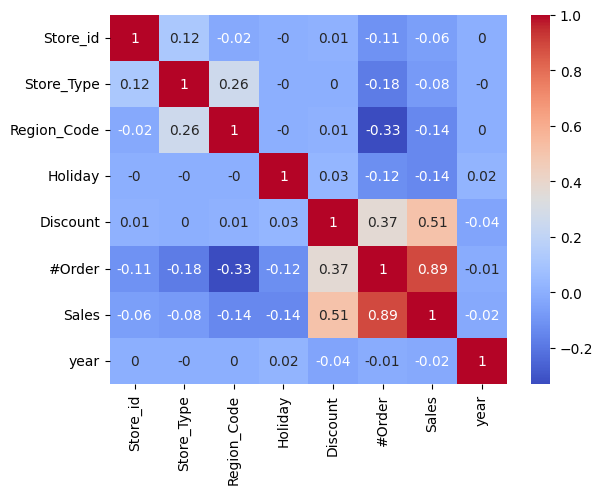

In [22]:
plt.figure()
sb.heatmap(co_matrix, annot=True, cmap="coolwarm")
plt.show()


Here, we can see from above heatmap of correlation coefficient of variables, store_id and year not much related to our target variable sales. Thus, we are excluding those variables in our further analysis.

In [23]:
MacBookAir_data=MacBookAir_data.drop(["year","Store_id"],axis=1)

Model Training: Decision Tree regressor with GridSearchCV

In [24]:
dfx = MacBookAir_data.drop("Sales",axis=1)

In [25]:
dfy = MacBookAir_data['Sales'] #spliting our datset into input and out put dataset. dfx is input and dfy is output

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler=MinMaxScaler()

In [28]:
scaled_dfx = pd.DataFrame(scaler.fit_transform(dfx),columns=dfx.columns) #scaling our data into one scale as its good when you are using ML model

In [29]:
scaled_dfx.head()

,Store_Type,Apple_products,Region_Code,Holiday,Discount,#Order
0,0.0,0.0,0.000000,1.0,1.0,0.000000
1,0.5,0.0,0.000000,1.0,1.0,0.162791
2,0.5,0.0,1.000000,1.0,1.0,0.616279
3,0.0,0.0,0.333333,1.0,1.0,0.348837
4,0.5,0.0,0.666667,1.0,1.0,0.534884


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(scaled_dfx, dfy, test_size=0.2, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
DT = DecisionTreeRegressor()

In [34]:
# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
# Define GridSearchCV
grid_search = GridSearchCV(estimator=DT, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [37]:
grid_search.fit(scaled_dfx,dfy)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [38]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [39]:
print("Best Parameters:", best_params)
print("Best Score (negative mean squared error):", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score (negative mean squared error): -10792756.062823502


In [40]:
DT_Grid=DecisionTreeRegressor(max_depth=None, min_samples_leaf=4, min_samples_split=2)

In [41]:
DT_Grid.fit(x_train,y_train)

DecisionTreeRegressor(min_samples_leaf=4)

In [42]:
Pred_DT_Grid=DT_Grid.predict(x_test)

In [43]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error

In [44]:
import numpy as np

In [45]:
mae_DT_Grid = mean_absolute_error(y_test, Pred_DT_Grid)
rmse_DT_Grid = np.sqrt(mean_squared_error(y_test, Pred_DT_Grid))

In [46]:
print('Mean Absolute Error:', mae_DT_Grid)
print('Root Mean Squared Error:', rmse_DT_Grid)

Mean Absolute Error: 2434.201106327867
Root Mean Squared Error: 3192.622235073951


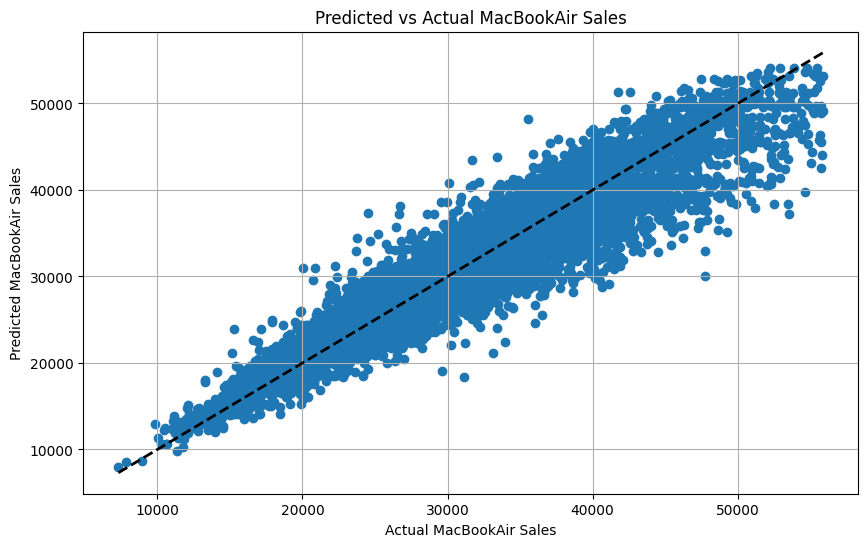

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Pred_DT_Grid)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual MacBookAir Sales')
plt.ylabel('Predicted MacBookAir Sales')
plt.title('Predicted vs Actual MacBookAir Sales')
plt.grid(True)
plt.show()